In [4]:
import os
import collections
import numpy as np
from vocab import Vocab

In [161]:
seattle = {'true': '/s0/ajaech/seattle',
           'greedy': '/homes/ajaech/belmopan/code/seattle',
            'hash': 'homes/ajaech/belmopan/code/seattle2'}
relationships = {'true': '/s0/ajaech/truerelationships',
                 'greedy': '/s0/ajaech/relationships'}
python = {'true': '/s0/ajaech/truepython',
         'greedy': '/s0/ajaech/python'}
math = {'true': '/s0/ajaech/truemath',
        'greedy': '/s0/ajaech/math8',
        'hash': '/s0/ajaech/math15.txt'}
buildapc = {'true': '/s0/ajaech/builda.txt',
            'hash': '/s0/ajaech/hashbuilda.txt',
             'greedy': '/s0/ajaech/nohashbuilda.txt'}
filenames = math

In [162]:
vocab = Vocab.Load('exps/reddit300/word_vocab.pickle')

In [163]:
def GetCounts(lines):
    counter = collections.Counter()
    for line in lines:
        words = line.split()
        counter.update(words)
    return counter

In [164]:
with open(filenames['greedy'], 'r') as f:
    lines = f.readlines()
    greedy_counts = GetCounts(lines[1:])

In [165]:
with open(filenames['hash'], 'r') as f:
    lines = f.readlines()
    hash_counts = GetCounts(lines[1:])

In [166]:
with open(filenames['true'], 'r') as f:
    lines = f.readlines()
    true_counts = GetCounts(lines)

In [167]:
all_words = vocab.GetWords()
def Convert(counts, prior=1):
    counts.update(all_words)
    del counts['<UNK>']
    del counts['</S>']
    total = float(sum(counts.values()))
    probs = [(w, counts[w] / total) for w in counts]
    return dict(probs)

In [168]:
true_probs = Convert(true_counts)
greedy_probs = Convert(greedy_counts)
hash_probs = Convert(hash_counts)

In [169]:
import pandas

In [170]:
table = []
for word in all_words:
    true_p = true_probs.get(word, 0.0)
    greedy_p = greedy_probs.get(word, 0.0)
    hash_p = hash_probs.get(word, 0.0)
    if max(true_p, greedy_p, hash_p) > 0.00001 and word in vocab:
        table.append({'word': word, 'truep': true_p, 'greedyp': greedy_p, 'hashp': hash_p})

In [171]:
df = pandas.DataFrame(table)

In [183]:
df['greedyratio'] = np.log10(df.truep / df.greedyp)
df['hashratio'] = np.log10(df.truep / df.hashp)
df['worst'] = df[['greedyratio', 'hashratio']].max(axis=1)
df.sort_values('worst', ascending=False)

,greedyp,hashp,truep,word,greedyratio,hashratio,worst
4523,0.000001,2.054430e-07,1.000775e-04,nash,1.844468,2.687645,2.687645
106,0.000001,2.054430e-07,5.926922e-05,/message/compose/,1.616961,2.460138,2.460138
3646,0.000001,5.238797e-05,2.380485e-04,integral,2.220797,0.657434,2.220797
6313,0.000001,2.958379e-05,1.875239e-04,sphere,2.117188,0.802003,2.117188
5940,0.000001,2.054430e-07,2.429066e-05,seatbelts,1.229571,2.072748,2.072748
7540,0.000009,4.879271e-04,9.978605e-04,},2.065050,0.310715,2.065050
324,0.000013,4.108860e-07,4.663807e-05,^|,0.558630,2.055019,2.055019
6864,0.000001,2.054430e-07,2.234741e-05,to=,1.193359,2.036536,2.036536
808,0.000001,4.314303e-06,1.544886e-04,axiom,2.033028,1.553986,2.033028
105,0.000001,2.054430e-07,2.137578e-05,/message/compose,1.174054,2.017231,2.017231


0      -0.279922
1       0.384311
2       0.023009
3       0.032480
4      -0.049679
5      -0.023614
6       0.088966
7       0.530601
8       0.087555
9      -0.003377
10     -0.227937
11      0.032809
12     -0.069283
13     -0.228282
14      0.011758
15      0.122776
16      0.178388
17      0.685905
18     -0.218457
19      0.031355
20      0.072748
21     -0.170290
22     -0.295229
23      0.444359
24      1.850899
25      0.197687
26      0.674808
27      0.475236
28      1.375699
29      0.375699
          ...   
7546    0.674808
7547    0.151929
7548    1.062080
7549   -0.469399
7550   -0.168369
7551   -0.168369
7552   -0.770429
7553   -0.469399
7554   -0.168369
7555   -0.168369
7556   -0.168369
7557   -0.645490
7558   -0.168369
7559   -0.168369
7560   -0.469399
7561   -0.168369
7562   -0.168369
7563   -0.168369
7564   -0.168369
7565   -0.168369
7566   -0.168369
7567   -0.168369
7568    0.095024
7569   -0.237237
7570   -0.430702
7571    1.239079
7572    0.431770
7573    1.2488

0.549914623884 0.618888678834


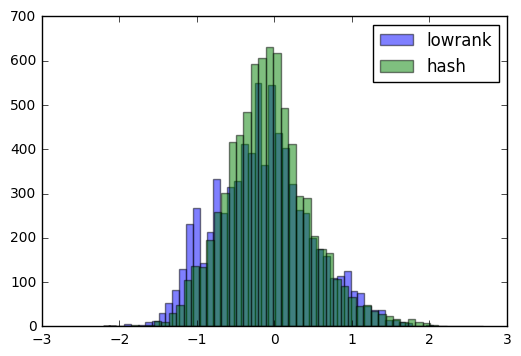

In [173]:
import numpy as np
from matplotlib import pyplot

r1 = np.log10(df.truep / df.hashp)
r2 = np.log10(df.truep / df.greedyp)
print np.std(r1), np.std(r2)
pyplot.hist(r2, bins=50, alpha=0.5)
pyplot.hist(r1, bins=50, alpha=0.5)
pyplot.legend(['lowrank', 'hash'])
pyplot.show()

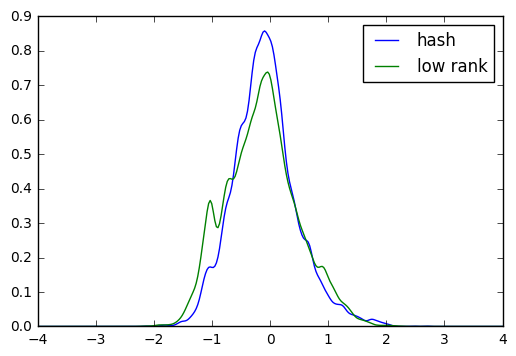

In [175]:
from scipy.stats import gaussian_kde
density = gaussian_kde(r1)
density2 = gaussian_kde(r2)
xs = np.linspace(-4, 4, 300)
density.covariance_factor = lambda : .1
density2.covariance_factor = lambda : .1
density._compute_covariance()
density2._compute_covariance()
pyplot.plot(xs, density(xs))
pyplot.plot(xs, density2(xs))
pyplot.legend(['hash', 'low rank'])
pyplot.show()

In [ ]:
#seattle_vals = r1

In [ ]:
#python_vals = r1
#python_vals.shape

In [ ]:
#math_vals = r
math_vals.shape

In [ ]:
seattle_vals.shape

In [ ]:
relationship_vals.shape

In [ ]:
all_vals = np.hstack([python_vals, seattle_vals, relationship_vals, math_vals])
pyplot.hist(all_vals, bins=100)
#pyplot.ylim([0, 20])

pyplot.xlabel('Log Odds Ratio')
pyplot.ylabel('Count')
pyplot.show()

In [ ]:
(np.abs(all_vals) > 1.0).sum() / float(len(all_vals))

In [ ]:
(all_vals < -1.0).sum() / float(len(all_vals))